# Universal Automated Tutor

Given a set of training questions, create a generalizable tutor that should infer a student’s understanding of underlying concepts based on their past performance on previous questions and choose the next training question which will optimize the student’s progression toward proficiency. 

# 1. The Data

In [51]:
from modelBuilder import importData
data, pairs = importData()

In [52]:
data.head()

,stud_id,duration,student_response_type,problem_id,step,attempt_num,last_attempt,outcome,input,feedback,hint,correct,incorrect
0,Stu_0012ae7d5d1993619f0bad91630b7c79,576.0,HINT_REQUEST,13603,"Step0:8788:Lines m and n are parallel, what is...",1.0,1.0,HINT,NaN,System displays first scaffold,1,0,0
1,Stu_0012ae7d5d1993619f0bad91630b7c79,75.0,HINT_REQUEST,13603,Step1:8792:What is the measure of angle 2? SYSTEM,1.0,0.0,HINT,NaN,Lines m and n are parallel and intersected by ...,1,0,0
2,Stu_0012ae7d5d1993619f0bad91630b7c79,37.0,ATTEMPT,13603,Step1:8792:What is the measure of angle 2? SYSTEM,2.0,1.0,INCORRECT,55,That is not correct. Try again.,0,0,1
3,Stu_0012ae7d5d1993619f0bad91630b7c79,166.0,ATTEMPT,13450,Step0:8635:Jacqueline is a runner who hopes to...,1.0,1.0,CORRECT,9 miles,NaN,0,1,0
4,Stu_00176143fc2991346939888160a9b1ce,14.0,HINT_REQUEST,12489,Step0:7674:Lee correctly answered 26 out of 51...,1.0,1.0,HINT,NaN,System displays first scaffold,1,0,0


# 2. Distributions

Explanation of how you are building distributions using ALL of the data from our students. Include picture for chi-sq distribution

In [4]:
from modelBuilder import distributionBuilder
distributions = distributionBuilder(data)

In [5]:
distributions.head()

,durationLower,hintLower,incorrectLower,durationUpper,hintUpper,incorrectUpper
problem_id,,,,,,
7,266.446968,4.718327,1.997720,522.125296,8.794116,4.312253
12,98.950352,1.373719,1.300298,253.682629,5.835896,3.399405
21,42.653503,0.101037,0.605915,93.110577,0.786937,1.557401
22,188.791350,1.545082,1.131963,321.094223,3.740606,2.951458
26,86.887437,0.742887,0.515258,188.347077,3.050812,1.530460


# 3. The Student

Next we create a Student object which stores information about the average number of incorrect answers per question, the average number of hints taken, and the average duration per problem, and a function to determine the next question based on their given averages. Everyone who uses the tutor will be their own instance of a student object.

In [59]:
from student import Student
from modelBuilder import getStudentData

studentData = getStudentData(data)
student = Student(studentData)
student.nextQ(data, pairs, distributions)

Based on the distribution above, and the student's average duration, number of hints, and number of incorrect, the student is assigned a problem.

In [62]:
student.problem

'Which of the following measurements would most likely be given with a negative exponent in scientific notation?'

In [63]:
student.answer

'small'

# 4. Running the Model
The function model.initialize() runs through all the code above to return the student object, the original dat, the question-answer pairs, and the distributions.

In [ ]:
student, originalData, QApairs, distributions = model.initialize()

With this information, the GUI is ready to boot up.

Each question takes a certain duration and has a specific outcome: hint, incorrect, correct. Thus each question from start to finish (once correct) generates a dataframe like this,

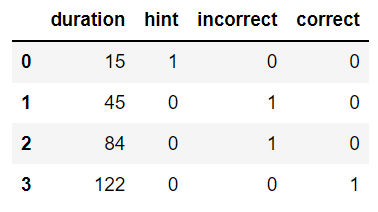

Once the result is correct (as shown above), the dataframe is passed to the student class function,

In [66]:
student.updateStudent(df).

This recalculates the student's average question duration, # of hints, and # of incorrect. Since these averages changed, we once again call,

In [ ]:
student.nextQ(data, pairs, distributions)

which generates the next question from those in the zone of proximal development.